In [115]:
# Trying Neural Network
import numpy as  np
import pandas as pd
import keras as keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('deng_train.csv')

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [116]:
# transforming dataframe and scaling data
# any blanks were replaced by median in excel
traindf = pd.get_dummies(df)

In [117]:
# correlation matrix
corr = traindf.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' and 'BrBG' is another colour mapping

In [118]:
# create results df
results = traindf.loc[:,['total_cases']]

In [119]:
# remove y values from feature df
newtraindf = traindf.drop(columns=['total_cases'])
newtraindf.head(1)

,year,weekofyear,datevalue,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,monthofyear_June,monthofyear_March,monthofyear_May,monthofyear_November,monthofyear_October,monthofyear_September,season_Autumn,season_Spring,season_Summer,season_Winter
0,1990,18,30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,0,0,0,0,0,0,0,1,0,0


In [120]:
results = np.reshape(results, (-1,1))
scaler_x = MinMaxScaler()
print(scaler_x.fit(newtraindf))
xscale = scaler_x.transform(newtraindf)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [121]:
x_train, x_test, y_train, y_test = train_test_split(xscale, results, test_size = 0.25)

In [122]:
model = Sequential()
model.add(Dense(12, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 12)                504       
_________________________________________________________________
dense_28 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_29 (Dense)             (None, 12)                252       
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(loss='mae', optimizer='adam')

In [133]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)

Train on 873 samples, validate on 219 samples
Epoch 1/1000
873/873 [==============================] - 0s 80us/step - loss: 15.3511 - val_loss: 14.5324
Epoch 2/1000
873/873 [==============================] - 0s 76us/step - loss: 15.3731 - val_loss: 14.5175
Epoch 3/1000
873/873 [==============================] - 0s 73us/step - loss: 15.3587 - val_loss: 14.4446
Epoch 4/1000
873/873 [==============================] - 0s 49us/step - loss: 15.3452 - val_loss: 14.5059
Epoch 5/1000
873/873 [==============================] - 0s 53us/step - loss: 15.3510 - val_loss: 14.6380
Epoch 6/1000
873/873 [==============================] - 0s 47us/step - loss: 15.3129 - val_loss: 14.4976
Epoch 7/1000
873/873 [==============================] - 0s 47us/step - loss: 15.3418 - val_loss: 14.6515
Epoch 8/1000
873/873 [==============================] - 0s 58us/step - loss: 15.3298 - val_loss: 14.5280
Epoch 9/1000
873/873 [==============================] - 0s 48us/step - loss: 15.3410 - val_loss: 14.4923
Epoch 10/

Epoch 78/1000
873/873 [==============================] - 0s 60us/step - loss: 15.2606 - val_loss: 14.5608
Epoch 79/1000
873/873 [==============================] - 0s 50us/step - loss: 15.2347 - val_loss: 14.4379
Epoch 80/1000
873/873 [==============================] - 0s 44us/step - loss: 15.2272 - val_loss: 14.5596
Epoch 81/1000
873/873 [==============================] - 0s 47us/step - loss: 15.2234 - val_loss: 14.4782
Epoch 82/1000
873/873 [==============================] - 0s 44us/step - loss: 15.2278 - val_loss: 14.4732
Epoch 83/1000
873/873 [==============================] - 0s 46us/step - loss: 15.2199 - val_loss: 14.5680
Epoch 84/1000
873/873 [==============================] - 0s 50us/step - loss: 15.2428 - val_loss: 14.5789
Epoch 85/1000
873/873 [==============================] - 0s 39us/step - loss: 15.3043 - val_loss: 14.3563
Epoch 86/1000
873/873 [==============================] - 0s 38us/step - loss: 15.2709 - val_loss: 14.4837
Epoch 87/1000
873/873 [=======================

Epoch 155/1000
873/873 [==============================] - 0s 56us/step - loss: 15.1793 - val_loss: 14.4847
Epoch 156/1000
873/873 [==============================] - 0s 44us/step - loss: 15.1611 - val_loss: 14.5424
Epoch 157/1000
873/873 [==============================] - 0s 45us/step - loss: 15.1610 - val_loss: 14.5845
Epoch 158/1000
873/873 [==============================] - 0s 45us/step - loss: 15.3005 - val_loss: 14.6660
Epoch 159/1000
873/873 [==============================] - 0s 44us/step - loss: 15.2178 - val_loss: 14.4019
Epoch 160/1000
873/873 [==============================] - 0s 44us/step - loss: 15.1571 - val_loss: 14.6629
Epoch 161/1000
873/873 [==============================] - 0s 53us/step - loss: 15.2046 - val_loss: 14.5675
Epoch 162/1000
873/873 [==============================] - 0s 48us/step - loss: 15.1714 - val_loss: 14.5902
Epoch 163/1000
873/873 [==============================] - 0s 41us/step - loss: 15.1517 - val_loss: 14.4754
Epoch 164/1000
873/873 [=============

873/873 [==============================] - 0s 58us/step - loss: 15.1211 - val_loss: 14.5996
Epoch 232/1000
873/873 [==============================] - 0s 31us/step - loss: 15.0774 - val_loss: 14.5852
Epoch 233/1000
873/873 [==============================] - 0s 33us/step - loss: 15.0566 - val_loss: 14.5614
Epoch 234/1000
873/873 [==============================] - 0s 36us/step - loss: 15.0527 - val_loss: 14.6008
Epoch 235/1000
873/873 [==============================] - 0s 45us/step - loss: 15.0537 - val_loss: 14.4864
Epoch 236/1000
873/873 [==============================] - 0s 47us/step - loss: 15.1025 - val_loss: 14.6941
Epoch 237/1000
873/873 [==============================] - 0s 46us/step - loss: 15.0802 - val_loss: 14.4397
Epoch 238/1000
873/873 [==============================] - 0s 34us/step - loss: 15.0399 - val_loss: 14.6022
Epoch 239/1000
873/873 [==============================] - 0s 36us/step - loss: 15.0980 - val_loss: 14.7222
Epoch 240/1000
873/873 [============================

873/873 [==============================] - 0s 40us/step - loss: 14.9744 - val_loss: 14.5752
Epoch 308/1000
873/873 [==============================] - 0s 32us/step - loss: 14.9837 - val_loss: 14.5817
Epoch 309/1000
873/873 [==============================] - 0s 42us/step - loss: 14.9891 - val_loss: 14.5112
Epoch 310/1000
873/873 [==============================] - 0s 45us/step - loss: 14.9875 - val_loss: 14.5379
Epoch 311/1000
873/873 [==============================] - 0s 34us/step - loss: 14.9941 - val_loss: 14.5776
Epoch 312/1000
873/873 [==============================] - 0s 38us/step - loss: 15.0108 - val_loss: 14.3925
Epoch 313/1000
873/873 [==============================] - 0s 37us/step - loss: 14.9805 - val_loss: 14.5968
Epoch 314/1000
873/873 [==============================] - 0s 45us/step - loss: 14.9621 - val_loss: 14.4936
Epoch 315/1000
873/873 [==============================] - 0s 33us/step - loss: 14.9451 - val_loss: 14.5419
Epoch 316/1000
873/873 [============================

873/873 [==============================] - 0s 32us/step - loss: 14.8875 - val_loss: 14.3277
Epoch 384/1000
873/873 [==============================] - 0s 30us/step - loss: 15.0163 - val_loss: 14.6240
Epoch 385/1000
873/873 [==============================] - 0s 33us/step - loss: 14.9417 - val_loss: 14.4738
Epoch 386/1000
873/873 [==============================] - 0s 32us/step - loss: 14.8903 - val_loss: 14.4658
Epoch 387/1000
873/873 [==============================] - 0s 33us/step - loss: 14.9243 - val_loss: 14.4494
Epoch 388/1000
873/873 [==============================] - 0s 32us/step - loss: 14.9404 - val_loss: 14.5145
Epoch 389/1000
873/873 [==============================] - 0s 34us/step - loss: 14.8627 - val_loss: 14.4737
Epoch 390/1000
873/873 [==============================] - 0s 31us/step - loss: 14.9216 - val_loss: 14.5786
Epoch 391/1000
873/873 [==============================] - 0s 32us/step - loss: 14.9351 - val_loss: 14.3751
Epoch 392/1000
873/873 [============================

873/873 [==============================] - 0s 107us/step - loss: 14.8504 - val_loss: 14.4685
Epoch 460/1000
873/873 [==============================] - 0s 64us/step - loss: 14.8582 - val_loss: 14.3349
Epoch 461/1000
873/873 [==============================] - 0s 91us/step - loss: 14.9075 - val_loss: 14.4060
Epoch 462/1000
873/873 [==============================] - 0s 84us/step - loss: 14.8411 - val_loss: 14.5783
Epoch 463/1000
873/873 [==============================] - 0s 64us/step - loss: 14.8136 - val_loss: 14.4518
Epoch 464/1000
873/873 [==============================] - 0s 55us/step - loss: 14.8337 - val_loss: 14.4100
Epoch 465/1000
873/873 [==============================] - 0s 97us/step - loss: 14.8270 - val_loss: 14.3254
Epoch 466/1000
873/873 [==============================] - 0s 125us/step - loss: 14.8658 - val_loss: 14.5029
Epoch 467/1000
873/873 [==============================] - 0s 95us/step - loss: 14.8274 - val_loss: 14.3262
Epoch 468/1000
873/873 [==========================

873/873 [==============================] - 0s 40us/step - loss: 14.9036 - val_loss: 14.8941
Epoch 536/1000
873/873 [==============================] - 0s 41us/step - loss: 15.0287 - val_loss: 14.3114
Epoch 537/1000
873/873 [==============================] - 0s 38us/step - loss: 14.7952 - val_loss: 14.4188
Epoch 538/1000
873/873 [==============================] - 0s 37us/step - loss: 14.7619 - val_loss: 14.5306
Epoch 539/1000
873/873 [==============================] - 0s 36us/step - loss: 14.7511 - val_loss: 14.5227
Epoch 540/1000
873/873 [==============================] - 0s 37us/step - loss: 14.7592 - val_loss: 14.4662
Epoch 541/1000
873/873 [==============================] - 0s 37us/step - loss: 14.7549 - val_loss: 14.4619
Epoch 542/1000
873/873 [==============================] - 0s 39us/step - loss: 14.7681 - val_loss: 14.4703
Epoch 543/1000
873/873 [==============================] - 0s 44us/step - loss: 14.7445 - val_loss: 14.5834
Epoch 544/1000
873/873 [============================

873/873 [==============================] - 0s 47us/step - loss: 14.7617 - val_loss: 14.4468
Epoch 612/1000
873/873 [==============================] - 0s 39us/step - loss: 14.7027 - val_loss: 14.4052
Epoch 613/1000
873/873 [==============================] - 0s 39us/step - loss: 14.6806 - val_loss: 14.6304
Epoch 614/1000
873/873 [==============================] - 0s 39us/step - loss: 14.7216 - val_loss: 14.3574
Epoch 615/1000
873/873 [==============================] - 0s 40us/step - loss: 14.6765 - val_loss: 14.4825
Epoch 616/1000
873/873 [==============================] - 0s 34us/step - loss: 14.7123 - val_loss: 14.5129
Epoch 617/1000
873/873 [==============================] - 0s 33us/step - loss: 14.7541 - val_loss: 14.3503
Epoch 618/1000
873/873 [==============================] - 0s 39us/step - loss: 14.7333 - val_loss: 14.7016
Epoch 619/1000
873/873 [==============================] - 0s 36us/step - loss: 14.8842 - val_loss: 14.3594
Epoch 620/1000
873/873 [============================

873/873 [==============================] - 0s 46us/step - loss: 14.7758 - val_loss: 14.3342
Epoch 688/1000
873/873 [==============================] - 0s 41us/step - loss: 14.6616 - val_loss: 14.3206
Epoch 689/1000
873/873 [==============================] - 0s 50us/step - loss: 14.6338 - val_loss: 14.4097
Epoch 690/1000
873/873 [==============================] - 0s 42us/step - loss: 14.6610 - val_loss: 14.4410
Epoch 691/1000
873/873 [==============================] - 0s 38us/step - loss: 14.6193 - val_loss: 14.4070
Epoch 692/1000
873/873 [==============================] - 0s 39us/step - loss: 14.6338 - val_loss: 14.2793
Epoch 693/1000
873/873 [==============================] - 0s 37us/step - loss: 14.6933 - val_loss: 14.3232
Epoch 694/1000
873/873 [==============================] - 0s 38us/step - loss: 14.6972 - val_loss: 14.5092
Epoch 695/1000
873/873 [==============================] - 0s 32us/step - loss: 14.6837 - val_loss: 14.5010
Epoch 696/1000
873/873 [============================

873/873 [==============================] - 0s 50us/step - loss: 14.6634 - val_loss: 14.2312
Epoch 764/1000
873/873 [==============================] - 0s 45us/step - loss: 14.6187 - val_loss: 14.4911
Epoch 765/1000
873/873 [==============================] - 0s 45us/step - loss: 14.5961 - val_loss: 14.4497
Epoch 766/1000
873/873 [==============================] - 0s 42us/step - loss: 14.5903 - val_loss: 14.2703
Epoch 767/1000
873/873 [==============================] - 0s 39us/step - loss: 14.7328 - val_loss: 14.5992
Epoch 768/1000
873/873 [==============================] - 0s 50us/step - loss: 14.6787 - val_loss: 14.4825
Epoch 769/1000
873/873 [==============================] - 0s 40us/step - loss: 14.6833 - val_loss: 14.3507
Epoch 770/1000
873/873 [==============================] - 0s 41us/step - loss: 14.6200 - val_loss: 14.3078
Epoch 771/1000
873/873 [==============================] - 0s 34us/step - loss: 14.7137 - val_loss: 14.3847
Epoch 772/1000
873/873 [============================

873/873 [==============================] - 0s 95us/step - loss: 14.5093 - val_loss: 14.4691
Epoch 840/1000
873/873 [==============================] - 0s 87us/step - loss: 14.5541 - val_loss: 14.2484
Epoch 841/1000
873/873 [==============================] - 0s 83us/step - loss: 14.5294 - val_loss: 14.1923
Epoch 842/1000
873/873 [==============================] - 0s 65us/step - loss: 14.5222 - val_loss: 14.3508
Epoch 843/1000
873/873 [==============================] - 0s 63us/step - loss: 14.5191 - val_loss: 14.3209
Epoch 844/1000
873/873 [==============================] - 0s 71us/step - loss: 14.5123 - val_loss: 14.5574
Epoch 845/1000
873/873 [==============================] - 0s 69us/step - loss: 14.5294 - val_loss: 14.2682
Epoch 846/1000
873/873 [==============================] - 0s 60us/step - loss: 14.5248 - val_loss: 14.3323
Epoch 847/1000
873/873 [==============================] - 0s 54us/step - loss: 14.4876 - val_loss: 14.3285
Epoch 848/1000
873/873 [============================

873/873 [==============================] - 0s 53us/step - loss: 14.4851 - val_loss: 14.1160
Epoch 916/1000
873/873 [==============================] - 0s 89us/step - loss: 14.4285 - val_loss: 14.2647
Epoch 917/1000
873/873 [==============================] - 0s 56us/step - loss: 14.3903 - val_loss: 14.2298
Epoch 918/1000
873/873 [==============================] - 0s 57us/step - loss: 14.4068 - val_loss: 14.2449
Epoch 919/1000
873/873 [==============================] - 0s 54us/step - loss: 14.4006 - val_loss: 14.4435
Epoch 920/1000
873/873 [==============================] - 0s 52us/step - loss: 14.5327 - val_loss: 14.2650
Epoch 921/1000
873/873 [==============================] - 0s 47us/step - loss: 14.5512 - val_loss: 14.2872
Epoch 922/1000
873/873 [==============================] - 0s 55us/step - loss: 14.4285 - val_loss: 14.4118
Epoch 923/1000
873/873 [==============================] - 0s 46us/step - loss: 14.4168 - val_loss: 14.2310
Epoch 924/1000
873/873 [============================

873/873 [==============================] - 0s 49us/step - loss: 14.3306 - val_loss: 14.2138
Epoch 992/1000
873/873 [==============================] - 0s 47us/step - loss: 14.4010 - val_loss: 14.4703
Epoch 993/1000
873/873 [==============================] - 0s 42us/step - loss: 14.4260 - val_loss: 14.2387
Epoch 994/1000
873/873 [==============================] - 0s 48us/step - loss: 14.3277 - val_loss: 14.3280
Epoch 995/1000
873/873 [==============================] - 0s 41us/step - loss: 14.4722 - val_loss: 14.2534
Epoch 996/1000
873/873 [==============================] - 0s 36us/step - loss: 14.2987 - val_loss: 14.2325
Epoch 997/1000
873/873 [==============================] - 0s 45us/step - loss: 14.3328 - val_loss: 14.3391
Epoch 998/1000
873/873 [==============================] - 0s 38us/step - loss: 14.3776 - val_loss: 14.3043
Epoch 999/1000
873/873 [==============================] - 0s 42us/step - loss: 14.3448 - val_loss: 14.1551
Epoch 1000/1000
873/873 [===========================

dict_keys(['val_loss', 'loss'])


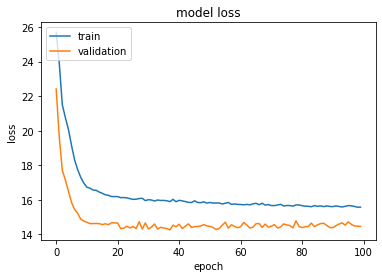

In [125]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [135]:
y_pred = round(pd.DataFrame(model.predict(x_test)), 0)
ann_err = mean_absolute_error(y_pred, y_test)
ann_err

14.642857142857142

In [136]:
# submission values, filling in missing data
dfsub = pd.read_csv('deng_test_x.csv')
dfsub = dfsub.fillna(dfsub.median())
dfsub.head(1)

,city,year,weekofyear,monthofyear,season,datevalue,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,April,Spring,29,29/04/2008,-0.0189,-0.0189,0.102729,...,25.37,78.781429,78.6,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2


In [137]:
traindf = dfsub.drop(columns=['week_start_date'])
traindf = pd.get_dummies(traindf)
traindf.head(1)

,year,weekofyear,datevalue,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,monthofyear_June,monthofyear_March,monthofyear_May,monthofyear_November,monthofyear_October,monthofyear_September,season_Autumn,season_Spring,season_Summer,season_Winter
0,2008,18,29,-0.0189,-0.0189,0.102729,0.0912,78.6,298.492857,298.55,...,0,0,0,0,0,0,0,1,0,0


In [138]:
print(scaler_x.fit(traindf))
traindf = scaler_x.transform(traindf)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [139]:
ann_pred = round(pd.DataFrame(model.predict(traindf)), 0)
ann_pred[ann_pred < 0] = 0

In [140]:
ann = dfsub[dfsub.columns[0:3]]
ann['total_cases'] = ann_pred
ann.to_csv('ANN_sub.csv')

C:\Users\jacka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
